<a href="https://colab.research.google.com/github/samarth2015/CS203_Lab_4/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1: Setup the dataset

- Load the MNIST dataset using the Hugging Face datasets library.
- Convert the image data into Numpy arrays and normalize pixel values to the range [0,1].
- Flatten each image into a vector of 784 features.
- Split the dataset into training and testing sets.
- Randomly select an initially labeled dataset of 200 samples from training samples.
- Generate an "Unlabeled Pool," the Initial Dataset excluding 200 samples.

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [ ]:
import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = datasets.load_dataset("mnist")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/15.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
# convert the image data into a numpy array and normalize the values from 0 to 1
X = np.array(data['train']["image"]) / 255
y = np.array(data['train']["label"])


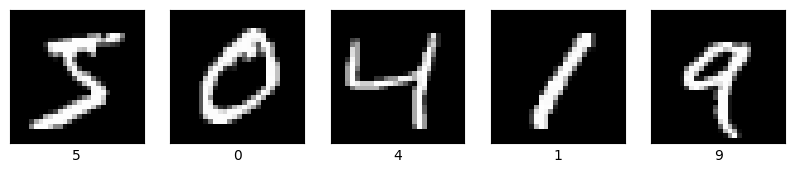

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))  # Adjusted size for 5 images in a row
for i in range(5):  # Looping only through the first 5 images
    plt.subplot(1, 5, i + 1)  # 1 row, 5 columns
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(28, -1), cmap='gray')  # Assuming grayscale images
    plt.xlabel(y[i])  # Display corresponding label
plt.show()


In [ ]:
X = X.reshape(X.shape[0], -1)
X.shape

(60000, 784)

In [ ]:
X_test = np.array(data['test']["image"]) / 255
y_test = np.array(data['test']["label"])

# flatten the test data
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
# randomly select 200 samples from training dataset and create a labelled dataset
np.random.seed(45)
idx = np.random.choice(X.shape[0], 200, replace=False)
X_train_labelled = X[idx]
y_train_labelled = y[idx]

In [ ]:
# create a pool of unlabelled data
X_train_unlabelled = np.delete(X, idx, axis=0)
y_train_unlabelled = np.delete(y, idx, axis=0)

X_train_unlabelled.shape


(59800, 784)

## Task 2: Implement Random Sampling for Active Learning


- Train a Random Forest Classifier (you can use “from sklearn.ensemble import RandomForestClassifier”)  on the initial dataset of 200 samples.
- Implement an active learning loop for 20 iterations:
    - Randomly select a sample from the unlabeled pool.
    - Get the selected sample and its true label.
    - Add the sample and label to the labeled dataset.
    - Remove the selected sample and label from the pool.
    - Retrain the model on the updated dataset.
    - Check the model's accuracy on the test set.
    - Print accuracy after every iteration.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# train a random forest classifier on the labelled data
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_labelled, y_train_labelled)

# predict the unlabelled data
y_prediction = clf.predict(X_test)

# calculate the accuracy of the classifier
accuracy = np.mean(y_test == y_prediction)
accuracy

0.7777

In [ ]:
# implementing active learning by for 20 iterations by randomly choosing the samples from the unlabelled pool.
task1_results = []
index=[]
for i in range(20):
    idx_curr = np.random.choice(X_train_unlabelled.shape[0], 1, replace=False) # randomly select 1 sample
    index.append(idx_curr)

    # add the sample to the labelled dataset
    X_train_labelled = np.concatenate([X_train_labelled, X_train_unlabelled[idx_curr]])
    y_train_labelled = np.concatenate([y_train_labelled, y_train_unlabelled[idx_curr]])

    # remove the sample from the unlabelled dataset
    X_train_unlabelled = np.delete(X_train_unlabelled, idx_curr, axis=0)
    y_train_unlabelled = np.delete(y_train_unlabelled, idx_curr, axis=0)

    # retrain the classifier
    clf.fit(X_train_labelled, y_train_labelled)

    # predict the unlabelled data
    y_prediction= clf.predict(X_test)

    # calculate the accuracy of the classifier
    accuracy = np.mean(y_test == y_prediction)
    task1_results.append(accuracy)
    print(f"Iteration: {i} Accuracy: {accuracy}")

Iteration: 0 Accuracy: 0.7705
Iteration: 1 Accuracy: 0.7791
Iteration: 2 Accuracy: 0.7682
Iteration: 3 Accuracy: 0.7717
Iteration: 4 Accuracy: 0.776
Iteration: 5 Accuracy: 0.7863
Iteration: 6 Accuracy: 0.7662
Iteration: 7 Accuracy: 0.7782
Iteration: 8 Accuracy: 0.7798
Iteration: 9 Accuracy: 0.7889
Iteration: 10 Accuracy: 0.7819
Iteration: 11 Accuracy: 0.7795
Iteration: 12 Accuracy: 0.7835
Iteration: 13 Accuracy: 0.7845
Iteration: 14 Accuracy: 0.7868
Iteration: 15 Accuracy: 0.7984
Iteration: 16 Accuracy: 0.8022
Iteration: 17 Accuracy: 0.7971
Iteration: 18 Accuracy: 0.7862
Iteration: 19 Accuracy: 0.7971


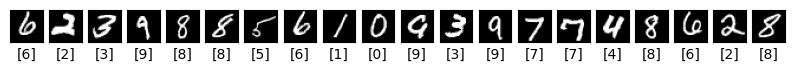

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(20):
    plt.subplot(1, 20, i + 1)  # 1 row, 20 columns
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[index[i]].reshape(28, -1), cmap='gray')  # Converting into grayscale images
    plt.xlabel(y[index[i]])  # Display corresponding label
plt.show()


## Task 3: Implement Uncertainty Sampling for Active Learning.

- Train a Random Forest Classifier (you can use “from sklearn.ensemble import RandomForestClassifier”)  on the initial dataset of 200 samples.
- Implement an active learning loop for 20 iterations:
    - Compute uncertainty (Label Entropy) for each sample in the unlabeled pool using entropy.
    - Select the sample with the highest uncertainty and query its true label.
    - Add the queried sample to the labelled dataset and remove it from the unlabelled pool.
    - Retrain the model and check the model's accuracy on the test set.
    - Print accuracy after every iteration


In [ ]:
np.random.seed(45)
idx = np.random.choice(X.shape[0], 200, replace=False)
X_train_labelled = X[idx]
y_train_labelled = y[idx]

X_train_unlabelled=np.delete(X,idx,axis=0)
y_train_unlabelled=np.delete(y,idx,axis=0)


In [ ]:
X_train_unlabelled.shape


(59800, 784)

In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_labelled,y_train_labelled)
y_prediction=clf.predict(X_test)
accuracy=np.mean(y_test==y_prediction)
accuracy

0.7777

In [ ]:
def labelentropy(probability):
    max_entropy=float('-inf') #Setting the highest entropy as -inf initially
    epsilon=1e-10 # a small value to prevent adding 0 in log2 in the entropy formula to prevent getting error
    maxind=-1
    for i in range(len(probability)):
        ent=-np.sum(probability[i]*np.log2(probability[i]+epsilon)) # Formula for entropy
        if(ent>max_entropy):
            max_entropy=ent #If the entropy calculated is greater than the previously found entropy then it becomes the new entropy and its index is saved
            maxind=i
    return [maxind]

In [ ]:
X_train_unlabelled[0].shape

(784,)

In [ ]:
task2_results=[]
ind1=[]
for i in range(20):
    probability=clf.predict_proba(X_train_unlabelled)
    idx_curr=labelentropy(probability)
    ind1.append(idx_curr)

    # add the sample to the labelled dataset
    X_train_labelled = np.concatenate([X_train_labelled, X_train_unlabelled[idx_curr]])
    y_train_labelled = np.concatenate([y_train_labelled, y_train_unlabelled[idx_curr]])

    # remove the sample from the unlabelled dataset
    X_train_unlabelled = np.delete(X_train_unlabelled, idx_curr, axis=0)
    y_train_unlabelled = np.delete(y_train_unlabelled, idx_curr, axis=0)

    # retrain the classifier
    clf.fit(X_train_labelled, y_train_labelled)

    # predict the unlabelled data
    y_prediction= clf.predict(X_test)

    # calculate the accuracy of the classifier
    accuracy = np.mean(y_test == y_prediction)
    task2_results.append(accuracy)
    print(f"Iteration: {i} Accuracy: {accuracy}")



Iteration: 0 Accuracy: 0.7726
Iteration: 1 Accuracy: 0.7711
Iteration: 2 Accuracy: 0.7844
Iteration: 3 Accuracy: 0.7796
Iteration: 4 Accuracy: 0.7779
Iteration: 5 Accuracy: 0.7785
Iteration: 6 Accuracy: 0.7799
Iteration: 7 Accuracy: 0.7667
Iteration: 8 Accuracy: 0.7749
Iteration: 9 Accuracy: 0.7783
Iteration: 10 Accuracy: 0.7833
Iteration: 11 Accuracy: 0.7794
Iteration: 12 Accuracy: 0.7967
Iteration: 13 Accuracy: 0.7949
Iteration: 14 Accuracy: 0.7759
Iteration: 15 Accuracy: 0.7903
Iteration: 16 Accuracy: 0.7824
Iteration: 17 Accuracy: 0.7838
Iteration: 18 Accuracy: 0.7874
Iteration: 19 Accuracy: 0.7933


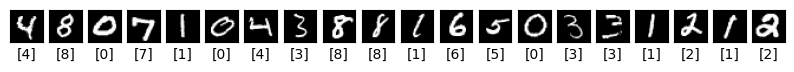

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(20):
    plt.subplot(1, 20, i + 1)  # 1 row, 20 columns
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[ind1[i]].reshape(28, -1), cmap='gray')  # Convert into grayscale images
    plt.xlabel(y[ind1[i]])  # Display corresponding label
plt.show()


In [ ]:
print(ind1) #Printing indices of the 20 uncertain samples

[[2829], [37039], [32313], [36307], [49260], [24476], [32384], [45712], [12173], [52699], [42968], [43166], [47115], [53118], [14350], [13673], [32710], [41260], [57301], [17137]]


## Task 4: Implement Query-by-Committee for Active Learning

- Initialize a committee of 5 Random Forest models, each trained on the initial dataset.
- In the active learning loop for 20 iterations:
    - For each unlabeled sample, compute predictions from all committee members.
    - Measure disagreement by calculating Vote Entropy.
    - Select the sample with the highest disagreement and query its true label.
    - Update the labelled dataset and retrain all models.
    - Check the model's accuracy on the test set.
    - Print accuracy after every iteration


In [ ]:
np.random.seed(45)
idx = np.random.choice(X.shape[0], 200, replace=False)
X_train_labelled = X[idx]
y_train_labelled = y[idx]

X_train_unlabelled=np.delete(X,idx,axis=0)
y_train_unlabelled=np.delete(y,idx,axis=0)

### Random Forest 1

In [ ]:

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_labelled,y_train_labelled)
y_prediction=clf.predict(X_test)


### Random Forest 2

In [ ]:
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(X_train_labelled,y_train_labelled)
y_prediction=clf1.predict(X_test)


### Random Forest 3

In [ ]:
clf2=RandomForestClassifier(n_estimators=100)
clf2.fit(X_train_labelled,y_train_labelled)
y_prediction=clf2.predict(X_test)


### Random Forest 4

In [ ]:
clf3=RandomForestClassifier(n_estimators=100)
clf3.fit(X_train_labelled,y_train_labelled)
y_prediction=clf3.predict(X_test)


### Random Forest 5

In [ ]:
clf4=RandomForestClassifier(n_estimators=100)
clf4.fit(X_train_labelled,y_train_labelled)
y_prediction=clf4.predict(X_test)


In [ ]:
print(len(X_train_unlabelled))

59800


In [ ]:
def voteentropy(X_train_unlabelled, clf, clf1, clf2, clf3, clf4):
    # Put the predictions from all classifiers into a 2D array
    predictions = np.array([
        clf.predict(X_train_unlabelled),
        clf1.predict(X_train_unlabelled),
        clf2.predict(X_train_unlabelled),
        clf3.predict(X_train_unlabelled),
        clf4.predict(X_train_unlabelled)
    ])

    # Transpose predictions to have shape (5, n_samples)
    predictions = predictions.T  # Now shape is (n_samples, 5)

    # Initialize an empty array for storing probabilities
    prob = np.zeros((predictions.shape[0], 10))

    # Add 0.2 for each prediction in the corresponding class
    for i in range(predictions.shape[0]):
        np.add.at(prob[i], predictions[i], 0.2)

    return prob


In [ ]:
task4_results=[]
ind2=[]
for i in range(20):
    probability=voteentropy(X_train_unlabelled,clf,clf1,clf2,clf3,clf4) # Probaility array returned by voteentropy function
    idx_curr=labelentropy(probability) #returning most uncertain index
    ind2.append(idx_curr)

    # add the sample to the labelled dataset
    X_train_labelled = np.concatenate([X_train_labelled, X_train_unlabelled[idx_curr]])
    y_train_labelled = np.concatenate([y_train_labelled, y_train_unlabelled[idx_curr]])

    # remove the sample from the unlabelled dataset
    X_train_unlabelled = np.delete(X_train_unlabelled, idx_curr, axis=0)
    y_train_unlabelled = np.delete(y_train_unlabelled, idx_curr, axis=0)

    # retrain the classifier
    clf.fit(X_train_labelled, y_train_labelled)

    # predict the unlabelled data
    y_prediction= clf.predict(X_test)

    # calculate the accuracy of the classifier
    accuracy = np.mean(y_test == y_prediction)
    task4_results.append(accuracy)
    print(f"Iteration: {i} Accuracy: {accuracy}")


Iteration: 0 Accuracy: 0.7909
Iteration: 1 Accuracy: 0.7992
Iteration: 2 Accuracy: 0.7809
Iteration: 3 Accuracy: 0.79
Iteration: 4 Accuracy: 0.7876
Iteration: 5 Accuracy: 0.7966
Iteration: 6 Accuracy: 0.805
Iteration: 7 Accuracy: 0.7975
Iteration: 8 Accuracy: 0.7996
Iteration: 9 Accuracy: 0.7985
Iteration: 10 Accuracy: 0.8032
Iteration: 11 Accuracy: 0.791
Iteration: 12 Accuracy: 0.8017
Iteration: 13 Accuracy: 0.8105
Iteration: 14 Accuracy: 0.8009
Iteration: 15 Accuracy: 0.8029
Iteration: 16 Accuracy: 0.8018
Iteration: 17 Accuracy: 0.7993
Iteration: 18 Accuracy: 0.799
Iteration: 19 Accuracy: 0.8156


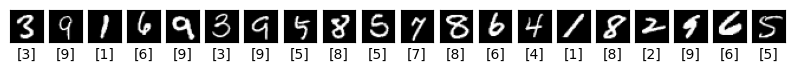

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))  # Adjusted size for 5 images in a row
for i in range(20):  # Looping only through the first 5 images
    plt.subplot(1, 20, i + 1)  # 1 row, 5 columns
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[ind2[i]].reshape(28, -1), cmap='gray')  # Assuming grayscale images
    plt.xlabel(y[ind2[i]])  # Display corresponding label
plt.show()


In [ ]:
print(ind2) #Printing index of the 20 uncertain indices

[[11233], [15128], [16076], [16297], [11626], [17116], [17410], [16446], [19783], [23792], [22313], [20648], [24157], [12867], [1069], [24349], [24467], [11647], [12959], [31230]]


## Task 5 Evaluation & Report


### Compare Final Model Accuracy Across All Three Strategies

- Random Sampling → Final Accuracy = 79.71%
- Uncertainty Sampling → Final Accuracy = 79.33%
- Query-by-Committee → Final Accuracy = 81.56%

Highest Accuracy was given by the Query-by-Committee approach

### Plot the Accuracy Graph

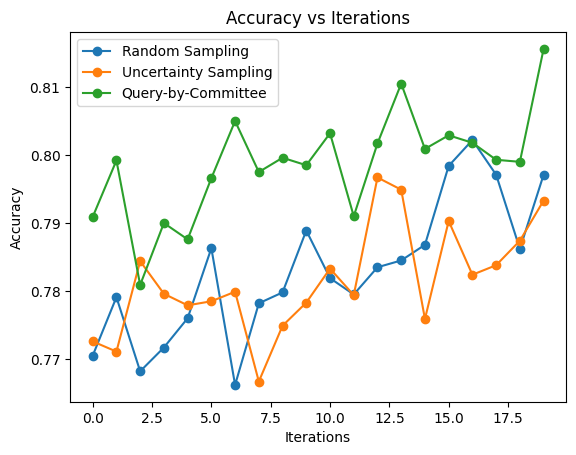

In [ ]:
iterations=np.arange(0,20,1)

plt.plot(iterations,task1_results,label="Random Sampling",marker = "o") #Plotting random sampling accuracy results
plt.plot(iterations,task2_results,label="Uncertainty Sampling",marker = "o") #Plotting uncertainty sampling accuracy results
plt.plot(iterations,task4_results,label="Query-by-Committee",marker = "o") #Plotting query-by-committee accuracy results
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iterations")
plt.legend()
plt.show()

### Cost-Effectiveness Analysis

- Random Sampling: Easy to implement but inefficient; might not improve accuracy significantly.
- Uncertainty Sampling: More cost-effective as it selects difficult samples, leading to faster learning.
- Query-by-Committee: Computationally expensive but can lead to better generalization if models disagree meaningfully.



### Findings & Limitations

#### Findings:
- Query-by-Committee achieved the highest final accuracy but was computationally expensive.
- Uncertainty Sampling improved accuracy faster than Random Sampling but was sensitive to noise.
- Random Sampling had the slowest improvement and was the least efficient.

#### Limitations:
- Fluctuations in accuracy due to small initial training set.
- Noise sensitivity in Uncertainty Sampling (if a wrongly labeled sample was added).
- Computational cost of Query-by-Committee (training multiple models).

#### Conclusion:
For cost-effective active learning, Uncertainty Sampling is the best trade-off between efficiency and accuracy. However, Query-by-Committee provides the best final accuracy if computational cost is not a concern.